<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
from scipy.stats import pearsonr
from sklearn import preprocessing
import seaborn as sns

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [5]:
df = df.loc[~df['Freedom'].isnull()]

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

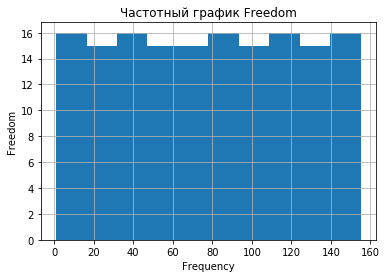

In [6]:
freedom = df['Freedom']
plt.hist(freedom, 10)

plt.xlabel('Frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

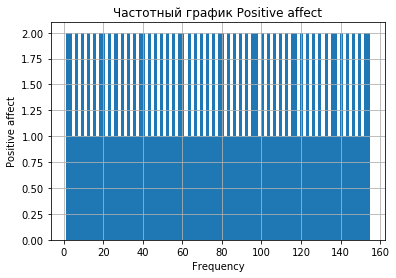

In [7]:
positive_affect = df['Positive affect']
plt.hist(freedom, 100)

plt.xlabel('Frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

**Я так понимаю это равномерное распределение**

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [13]:
statistics.mean(df['Freedom']) # математическое ожидание

78.0

In [14]:
statistics.median(df['Freedom']) # медиана

78.0

In [15]:
min_ = min((df['Freedom'])) # минимум
min_

1.0

In [16]:
max_ = max(df['Freedom']) # максимум
max_

155.0

In [17]:
max_ - min_ # размах

154.0

In [18]:
df['Freedom'].isnull().sum() # выбросы
# ранее удалил строку с NaN так как с ней не считалось среднее значение, поэтому 0 
#хотя вариант df['Freedom'].mean() (без statistics.) работала с наличием NaN

0

In [19]:
statistics.pstdev(df['Freedom']) # стандартное отклонение

44.74371464239419

In [20]:
statistics.pvariance(df['Freedom']) # дисперсия

2002.0

In [21]:
statistics.mode(df['Freedom']) # мода

StatisticsError: no unique mode; found 155 equally common values

Почему нельзя найти моду?

**Потому что все значения встречаются по одному разу**

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

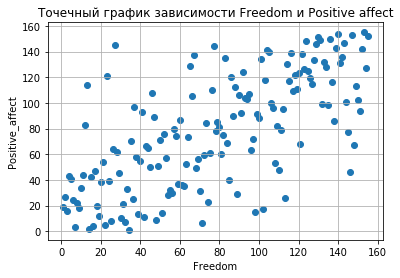

In [22]:
plt.xlabel('Freedom')
plt.ylabel('Positive_affect')
plt.title('Точечный график зависимости Freedom и Positive affect')
plt.grid(True)
plt.scatter(freedom, positive_affect)

In [23]:
corr, p_value = pearsonr(freedom, positive_affect)
corr

0.6817698430601657

**Freedom и Positive affect имеют прямую корреляцию 68%**

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [24]:
freedom_1 = freedom - statistics.mean(freedom)
statistics.mean(freedom_1)

0.0

In [25]:
min(freedom_1)

-77.0

In [26]:
max(freedom_1)

77.0

In [27]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

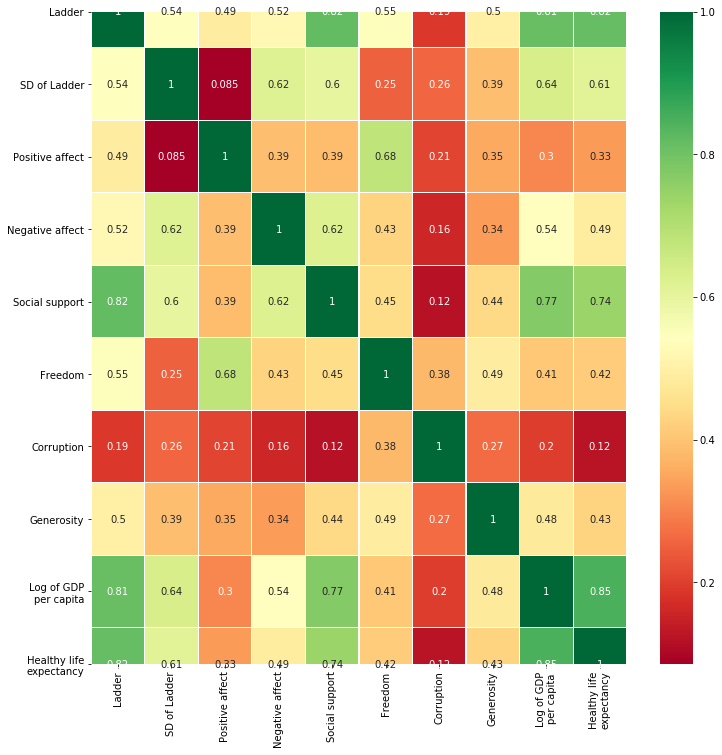

In [28]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [29]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_2=pd.read_csv(url)
df_2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [30]:
average_price = df_2['AveragePrice']

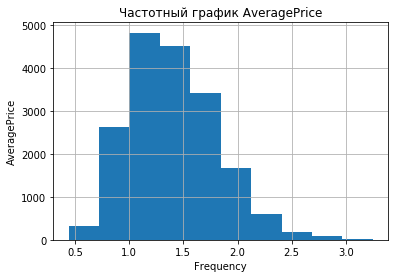

In [31]:
plt.hist(average_price, 10)

plt.xlabel('Frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

**Это нормальное распределение**

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [44]:
min_max_scaler_1 = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler_1.fit_transform(df_2[['4046', '4225', '4770', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3
0,0.000046,0.002660,0.000019,0.316726
1,0.000030,0.002181,0.000023,0.323843
2,0.000035,0.005332,0.000051,0.174377
3,0.000050,0.003516,0.000029,0.227758
4,0.000041,0.002142,0.000030,0.298932


In [57]:
с_4046 = df_norm[0]
с_4225 = df_norm[1]
с_4770 = df_norm[2]
a_p = df_norm[3]

In [58]:
corr_1, p_value_1 = pearsonr(с_4046, a_p)
print(corr_1)

-0.2083170484878848


In [59]:
corr_2, p_value_2 = pearsonr(с_4225, a_p)
print(corr_2)

-0.17292777250933541


In [60]:
corr_3, p_value_3 = pearsonr(с_4770, a_p)
print(corr_3)

-0.17944598397975625


In [64]:
# не совсем понимаю для чего нужна нормализация... с ней и без нее в этом примере получается одинаковый результат... 
# оставил с нормализацией...

**Существует незначительная обратная корреляция (17 -20%)... можно сделать вывод, что при увелечении средней цены уменьшаются продажи авокадо**